# Eigenfaces

Adapted from [here](https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html).

In [1]:
from sklearn import datasets

lfw_people = datasets.fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


n_samples: 1288
n_features: 1850
n_classes: 7


In [5]:
lfw_people.images[random_idx].shape


(50, 37)

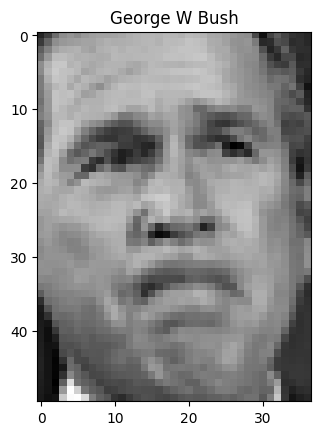

In [11]:
import random
import matplotlib.pyplot as plt

random_idx = random.randint(0, n_samples)
plt.imshow(lfw_people.images[random_idx].reshape((h, w)), cmap=plt.cm.gray);
plt.title(target_names[lfw_people.target[random_idx]]);


In [15]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.25, random_state=42
)


In [14]:
import scipy.stats
from sklearn import svm
from sklearn import pipeline
from sklearn import decomposition
from sklearn import model_selection
from sklearn import preprocessing

param_grid = {
    'C': scipy.stats.loguniform(1e3, 1e5),
    'gamma': scipy.stats.loguniform(1e-4, 1e-1),
}

model = pipeline.make_pipeline(
    preprocessing.StandardScaler(),
    decomposition.PCA(n_components=150),
    model_selection.RandomizedSearchCV(
        svm.SVC(kernel='rbf', class_weight='balanced'),
        param_grid,
        scoring='f1_macro',
        n_iter=20,
        random_state=42,
        verbose=2
    )
)


In [16]:
model = model.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .....C=5611.516415334504, gamma=0.07114476009343418; total time=   0.2s
[CV] END .....C=5611.516415334504, gamma=0.07114476009343418; total time=   0.1s
[CV] END .....C=5611.516415334504, gamma=0.07114476009343418; total time=   0.1s
[CV] END .....C=5611.516415334504, gamma=0.07114476009343418; total time=   0.1s
[CV] END .....C=5611.516415334504, gamma=0.07114476009343418; total time=   0.1s
[CV] END ....C=29106.35913133069, gamma=0.006251373574521747; total time=   0.1s
[CV] END ....C=29106.35913133069, gamma=0.006251373574521747; total time=   0.1s
[CV] END ....C=29106.35913133069, gamma=0.006251373574521747; total time=   0.1s
[CV] END ....C=29106.35913133069, gamma=0.006251373574521747; total time=   0.1s
[CV] END ....C=29106.35913133069, gamma=0.006251373574521747; total time=   0.1s
[CV] END .C=2051.3382630874494, gamma=0.00029375384576328287; total time=   0.1s
[CV] END .C=2051.3382630874494, gamma=0.0002937

In [17]:
model[-1].best_params_


{'C': 16738.085788752123, 'gamma': 0.00026210878782654396}

In [18]:
y_pred = model.predict(X_test)


In [19]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred, target_names=target_names))


                   precision    recall  f1-score   support

     Ariel Sharon       0.60      0.69      0.64        13
     Colin Powell       0.82      0.90      0.86        60
  Donald Rumsfeld       0.74      0.63      0.68        27
    George W Bush       0.87      0.93      0.90       146
Gerhard Schroeder       0.80      0.80      0.80        25
      Hugo Chavez       1.00      0.53      0.70        15
       Tony Blair       0.86      0.67      0.75        36

         accuracy                           0.83       322
        macro avg       0.81      0.74      0.76       322
     weighted avg       0.84      0.83      0.83       322



Let's visualize the false positives.

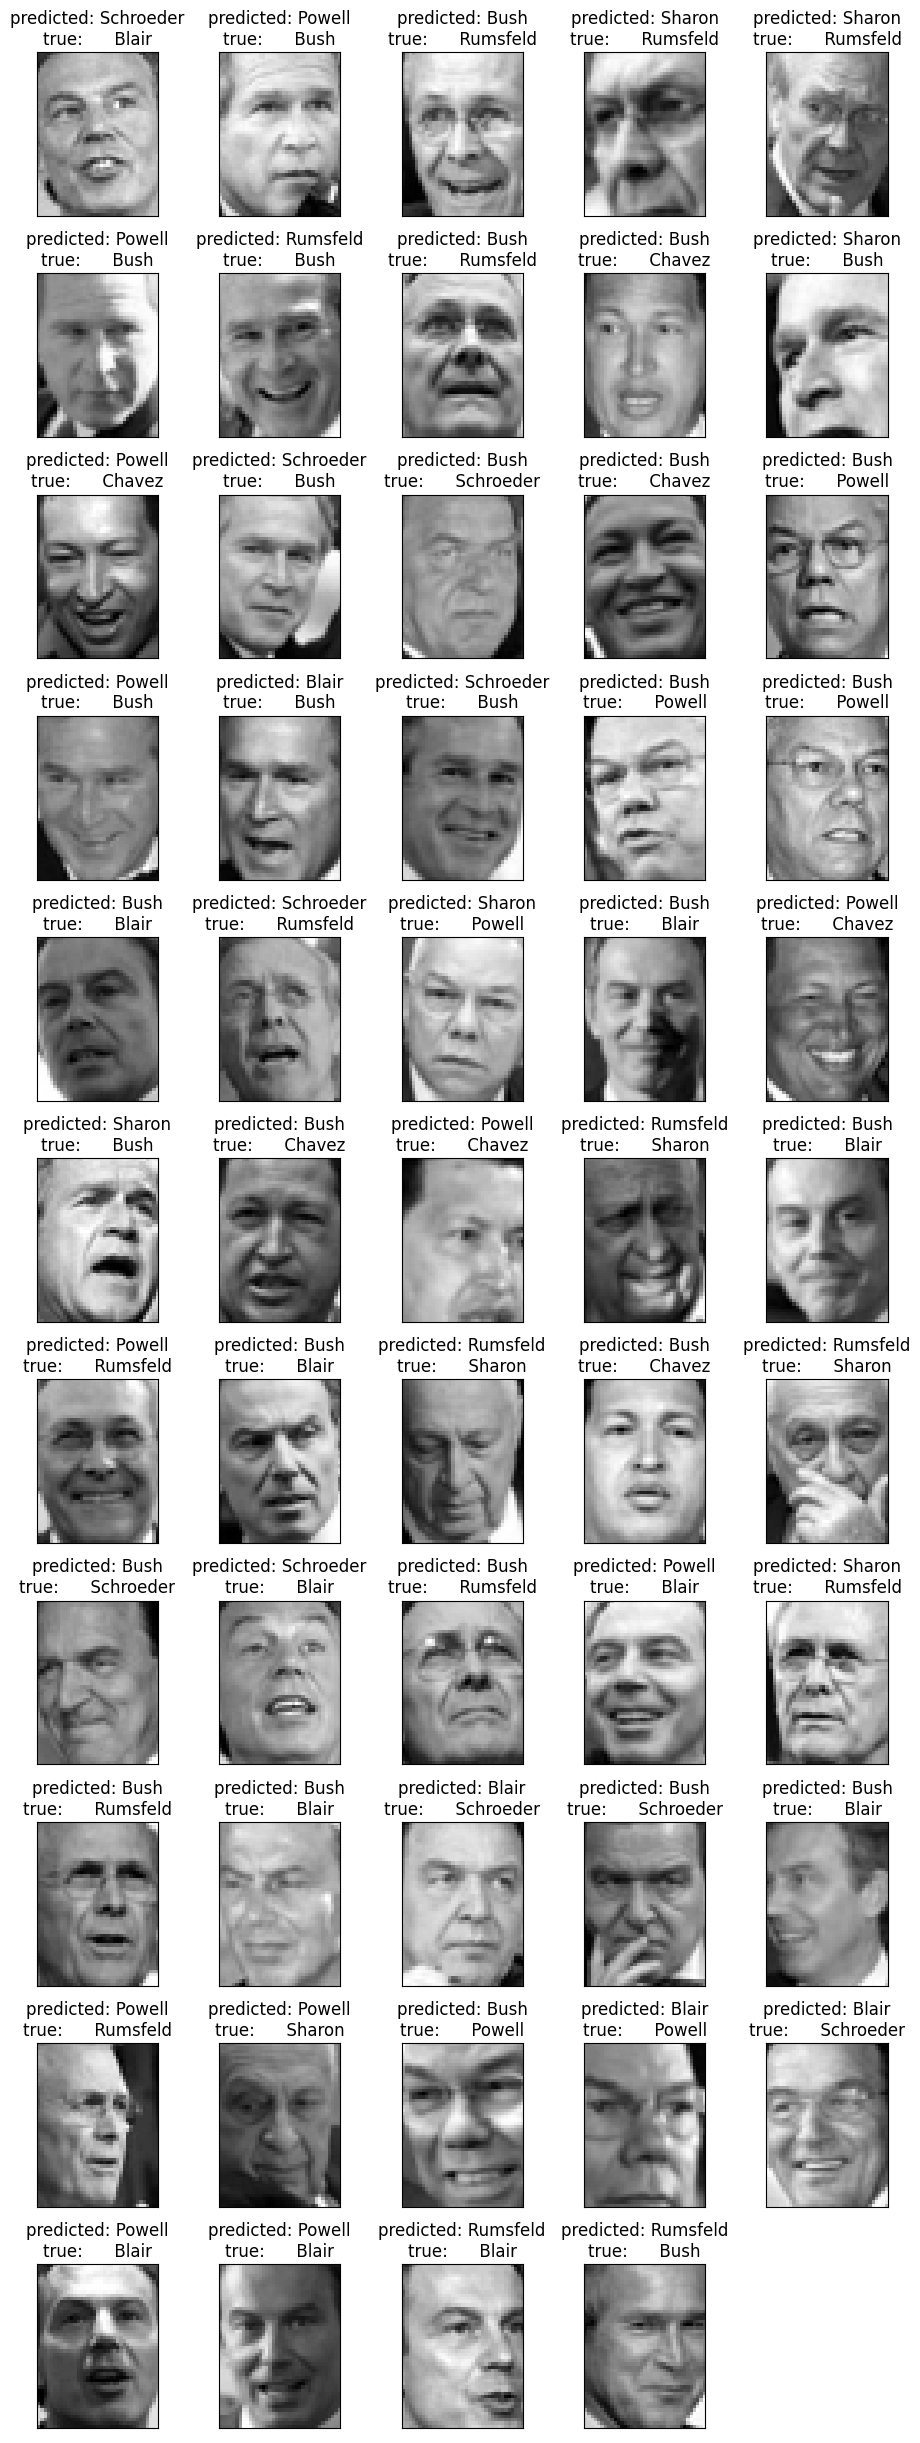

In [20]:
incorrect_mask = y_pred != y_test
X_incorrect = X_test[incorrect_mask]
y_pred_incorrect = y_pred[incorrect_mask]
y_test_incorrect = y_test[incorrect_mask]

n_cols = 5
n_rows = y_pred_incorrect.shape[0] // n_cols + 1

plt.figure(figsize=(1.8 * n_cols, 2.4 * n_rows))
plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)

for i in range(len(X_incorrect)):

    pred_name = target_names[y_pred_incorrect[i]].rsplit(" ", 1)[-1]
    true_name = target_names[y_test_incorrect[i]].rsplit(" ", 1)[-1]
    title = "predicted: {}\ntrue:      {}".format(pred_name, true_name)

    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(X_incorrect[i].reshape((h, w)), cmap=plt.cm.gray)
    plt.title(title, size=12)
    plt.xticks(())
    plt.yticks(())


Let's take a look at eigenfaces.

In [21]:
pca = model[1]
eigenfaces = pca.components_.reshape((pca.n_components, h, w))
eigenfaces.shape


(150, 50, 37)

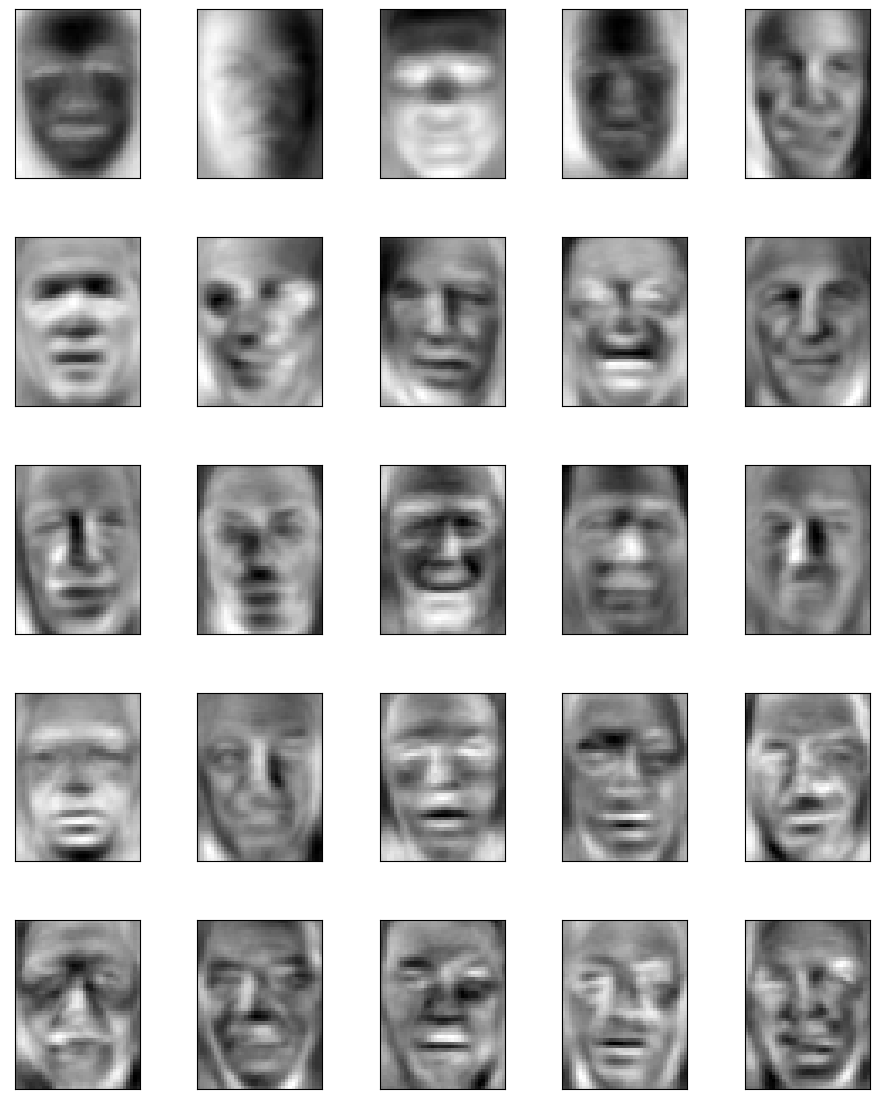

In [41]:
n_cols = 5
n_rows = 5

plt.figure(figsize=(1.8 * n_cols, 2.4 * n_rows))
plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)

for i, eigenface in enumerate(eigenfaces[:n_rows * n_cols]):

    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(eigenface, cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())


More information about eigenfaces [here](https://www.wikiwand.com/en/Eigenface). But the principle is quite general: music can be broken down into a sum of sine waves, images can be broken down into a sum of images, etc.

Of course, nowadays we use deep learning for face recognition, but this is a nice example of PCA (and other decomposition methods for that matter).